#**Current GPU Status and Utilization**

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

In [ ]:
!nvidia-smi

Wed Jun 26 06:32:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Working Directory**

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# **Install YOLOv8**

In [ ]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="your api key")
project = rf.workspace("yololearning-abk8v").project("france_vs_argentine")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to france_vs_argentine-2 in yolov8:: 100%|██████████| 520/520 [00:00<00:00, 7027.49it/s]


##**Training**

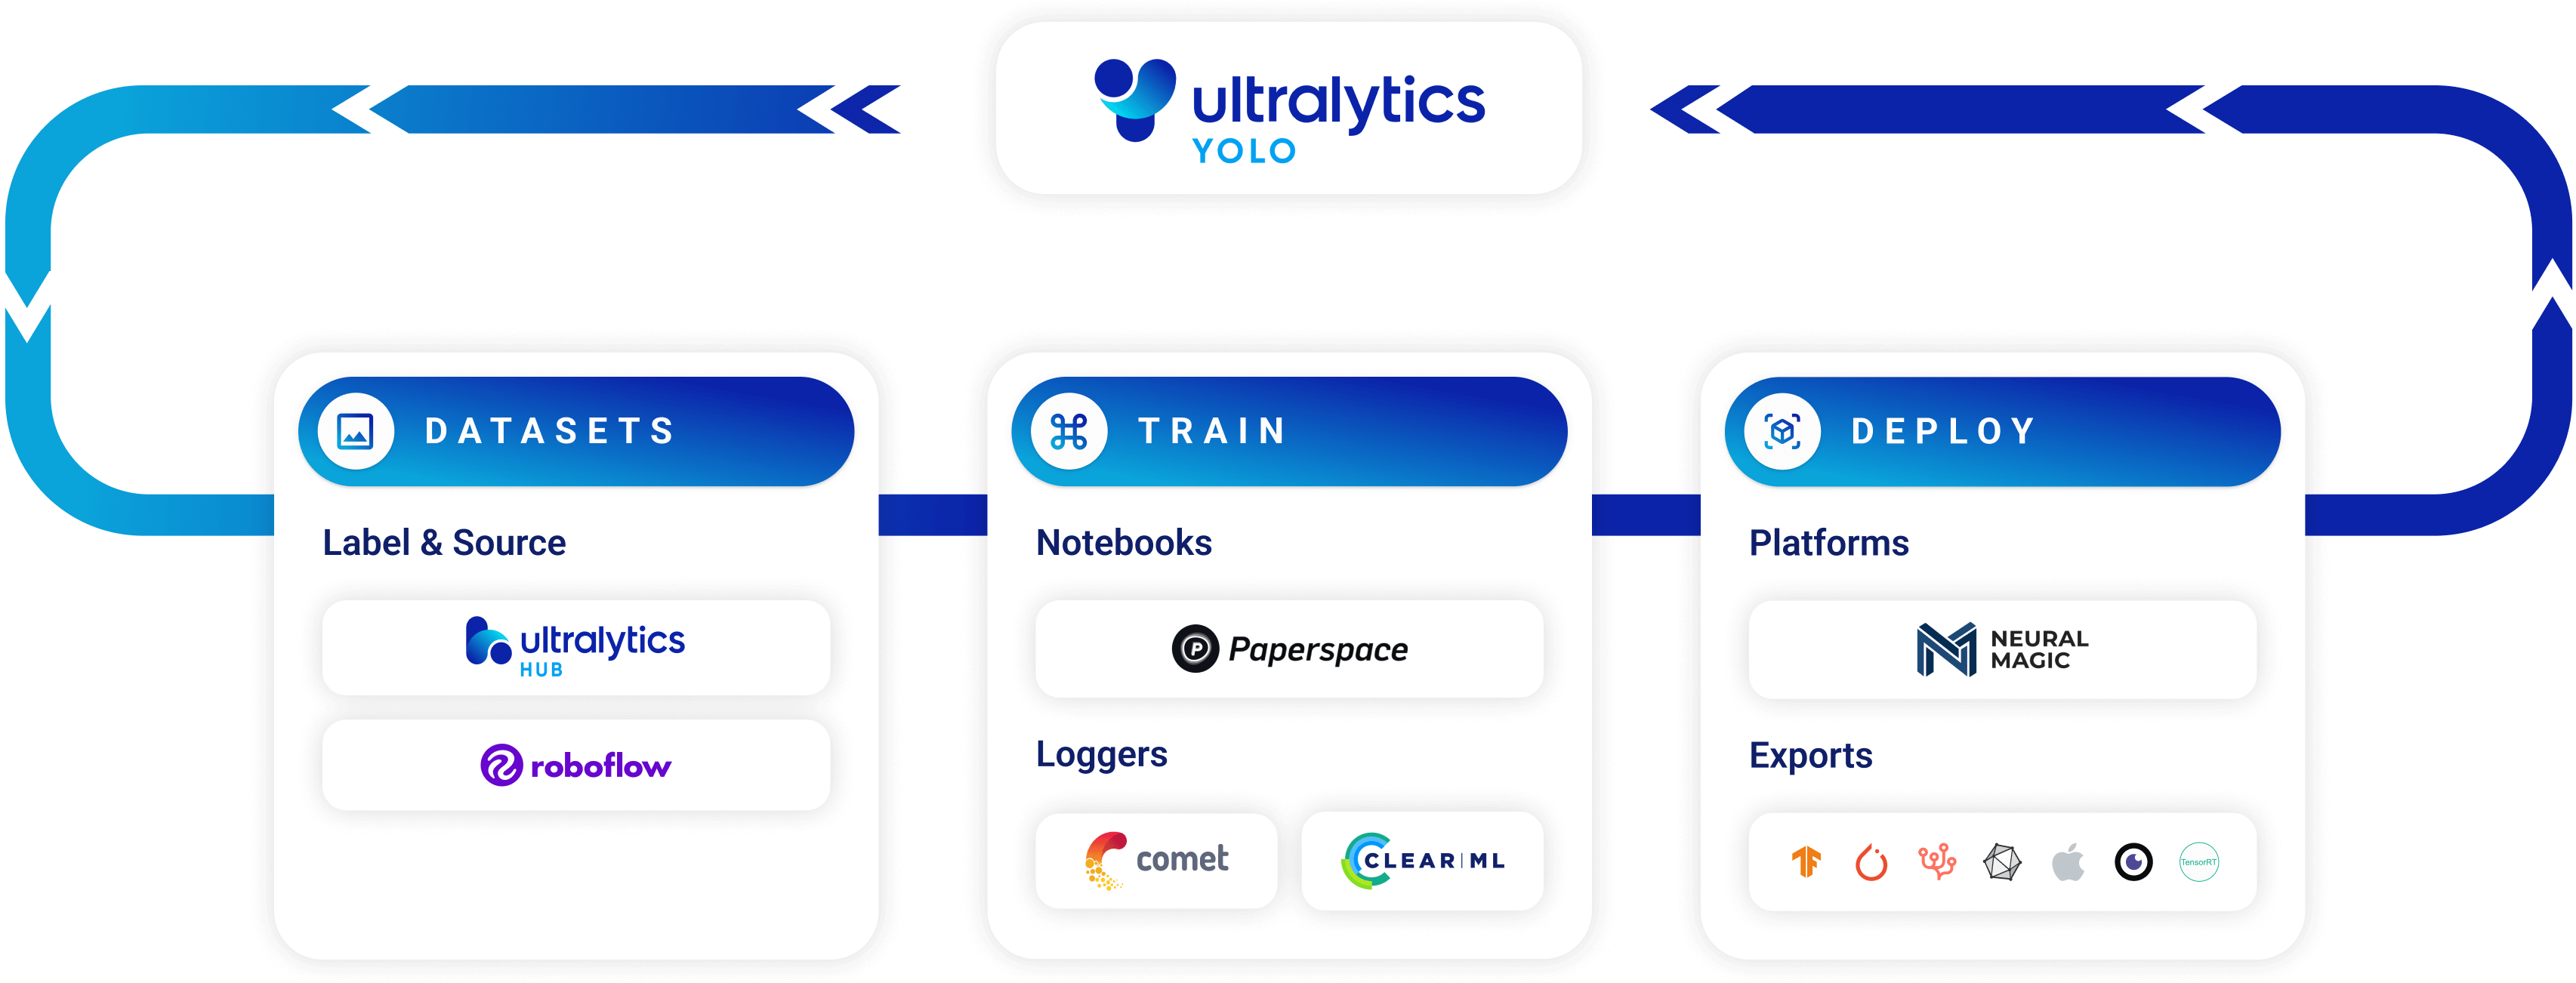

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 183MB/s]
New https://pypi.org/project/ultralytics/8.2.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/france_vs_argentine-2/data.yaml, epochs=200, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

# **Performance**

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   labels.jpg	 train_batch0.jpg
confusion_matrix_normalized.png			   P_curve.png	 train_batch1.jpg
confusion_matrix.png				   PR_curve.png  train_batch2.jpg
events.out.tfevents.1719383675.d6c08e75a7fc.711.0  R_curve.png	 val_batch0_labels.jpg
F1_curve.png					   results.csv	 val_batch0_pred.jpg
labels_correlogram.jpg				   results.png	 weights


/content


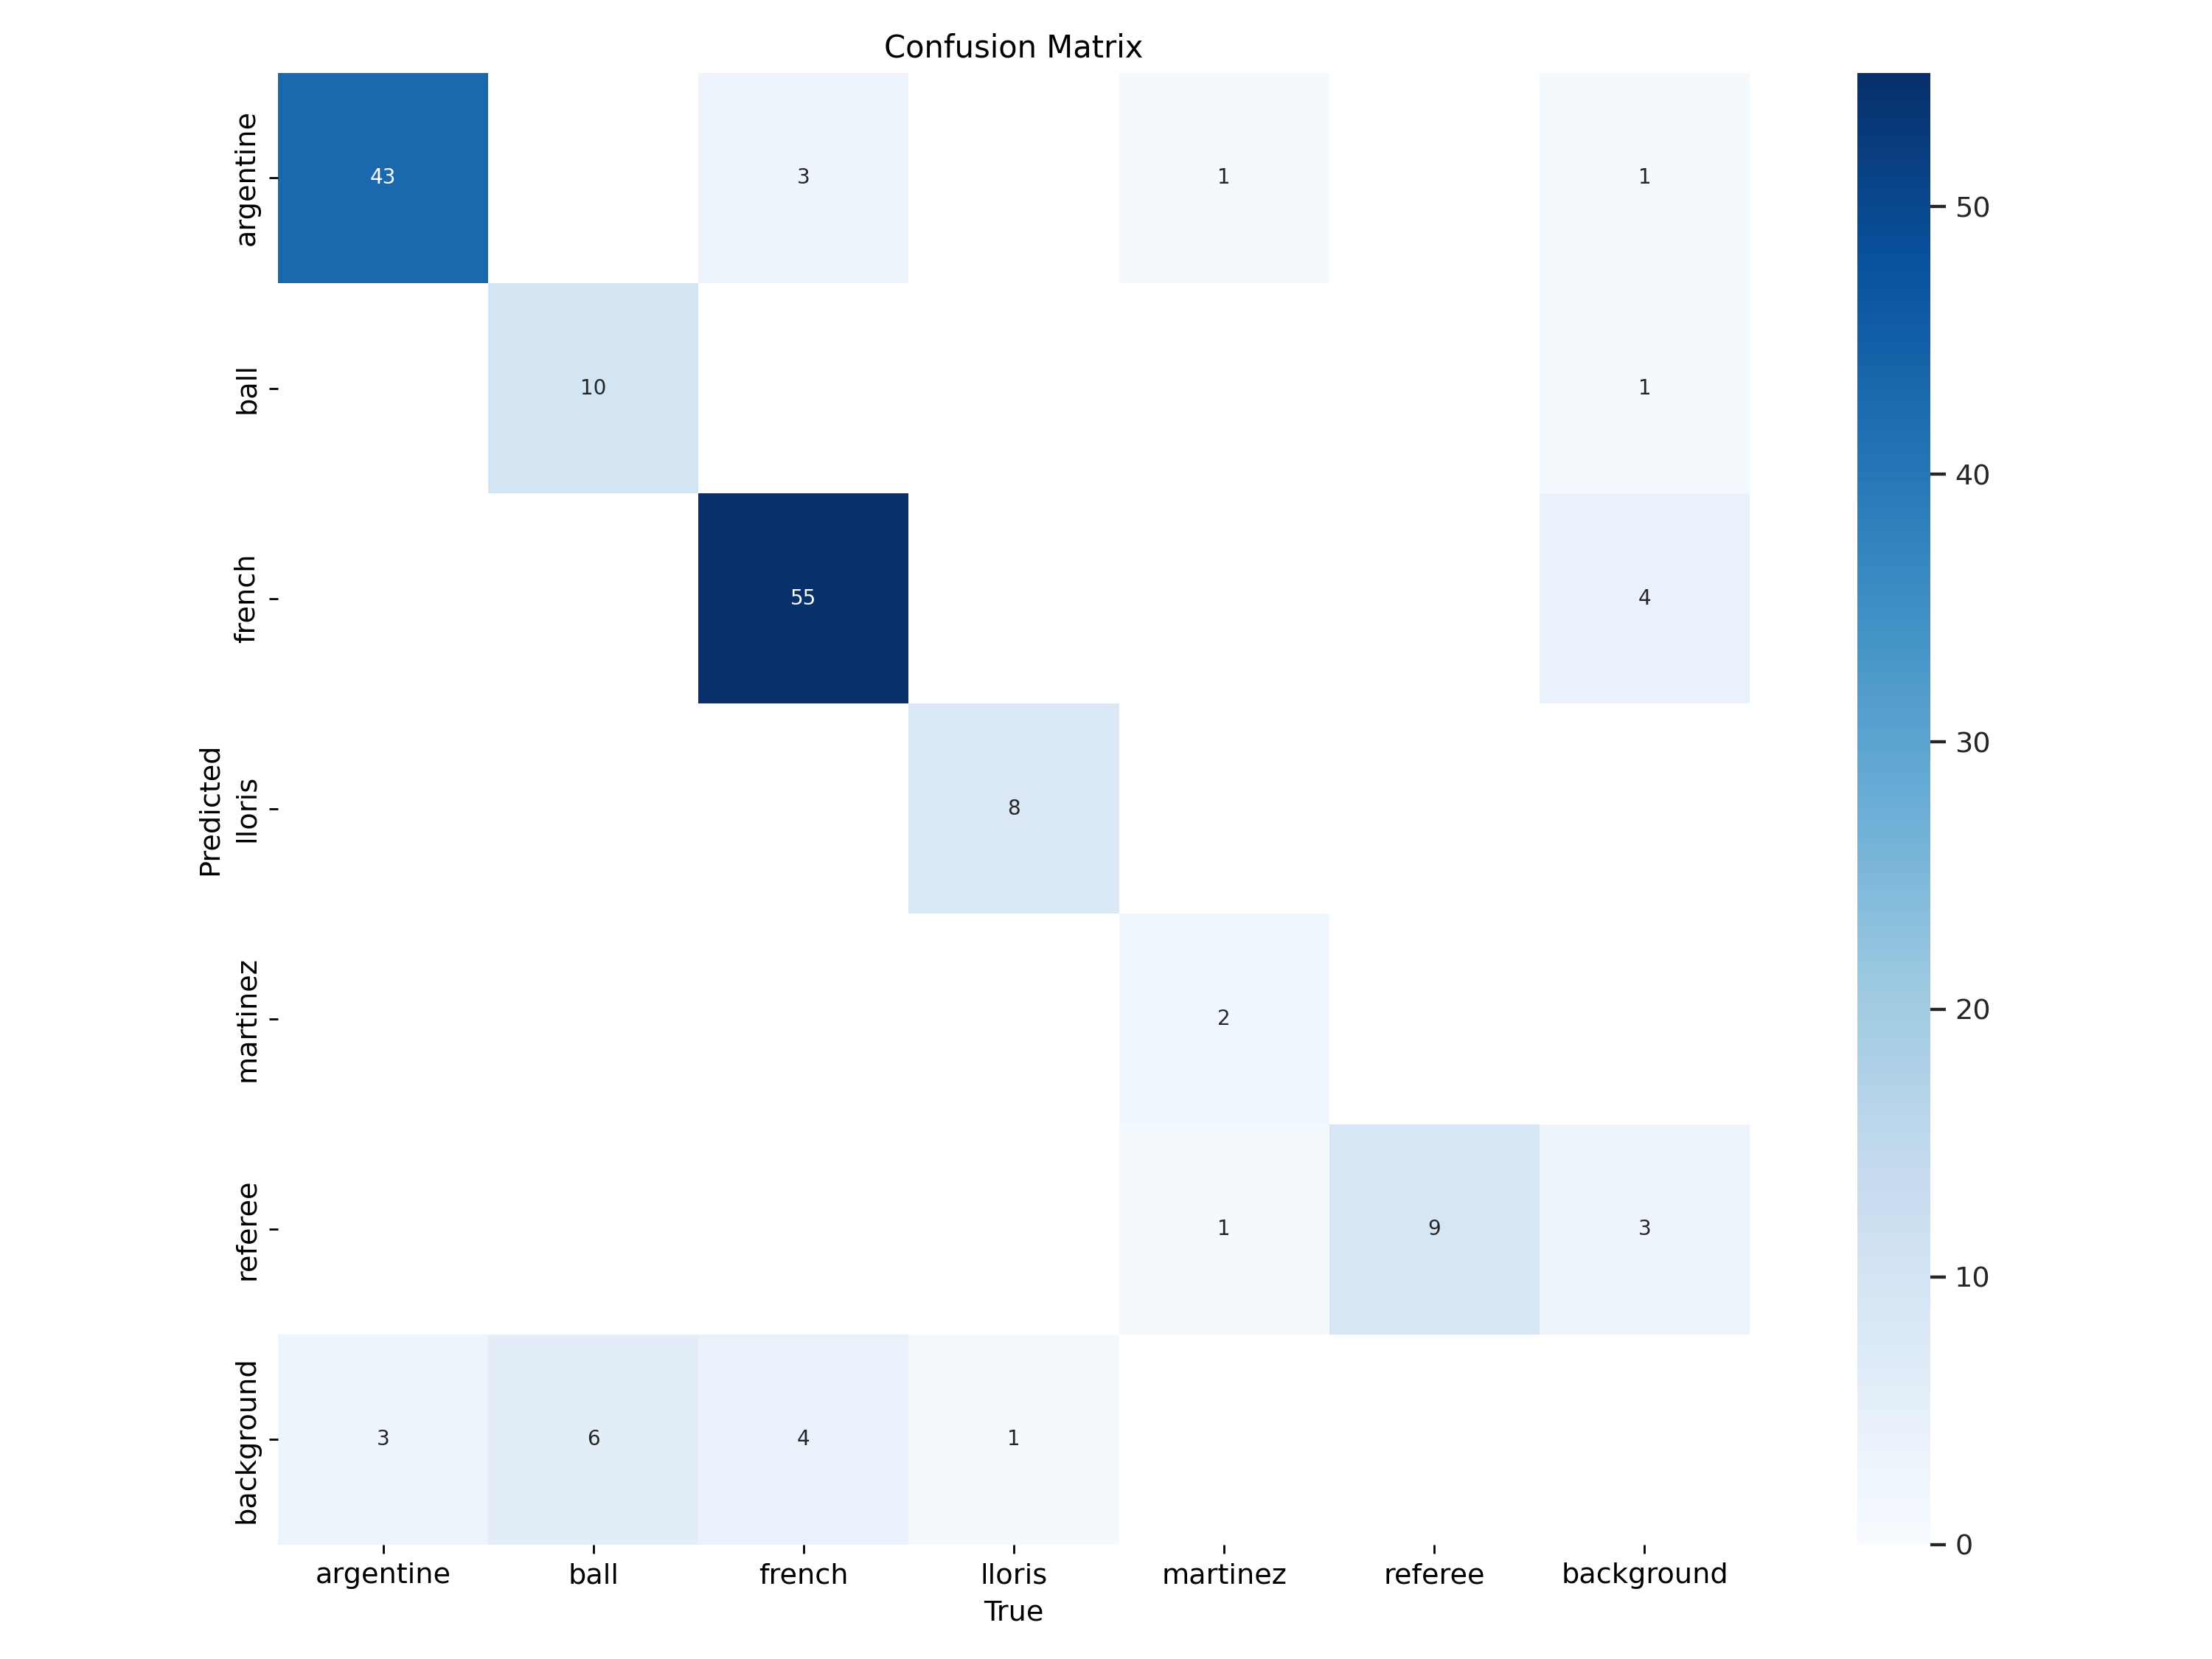

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1200)

/content


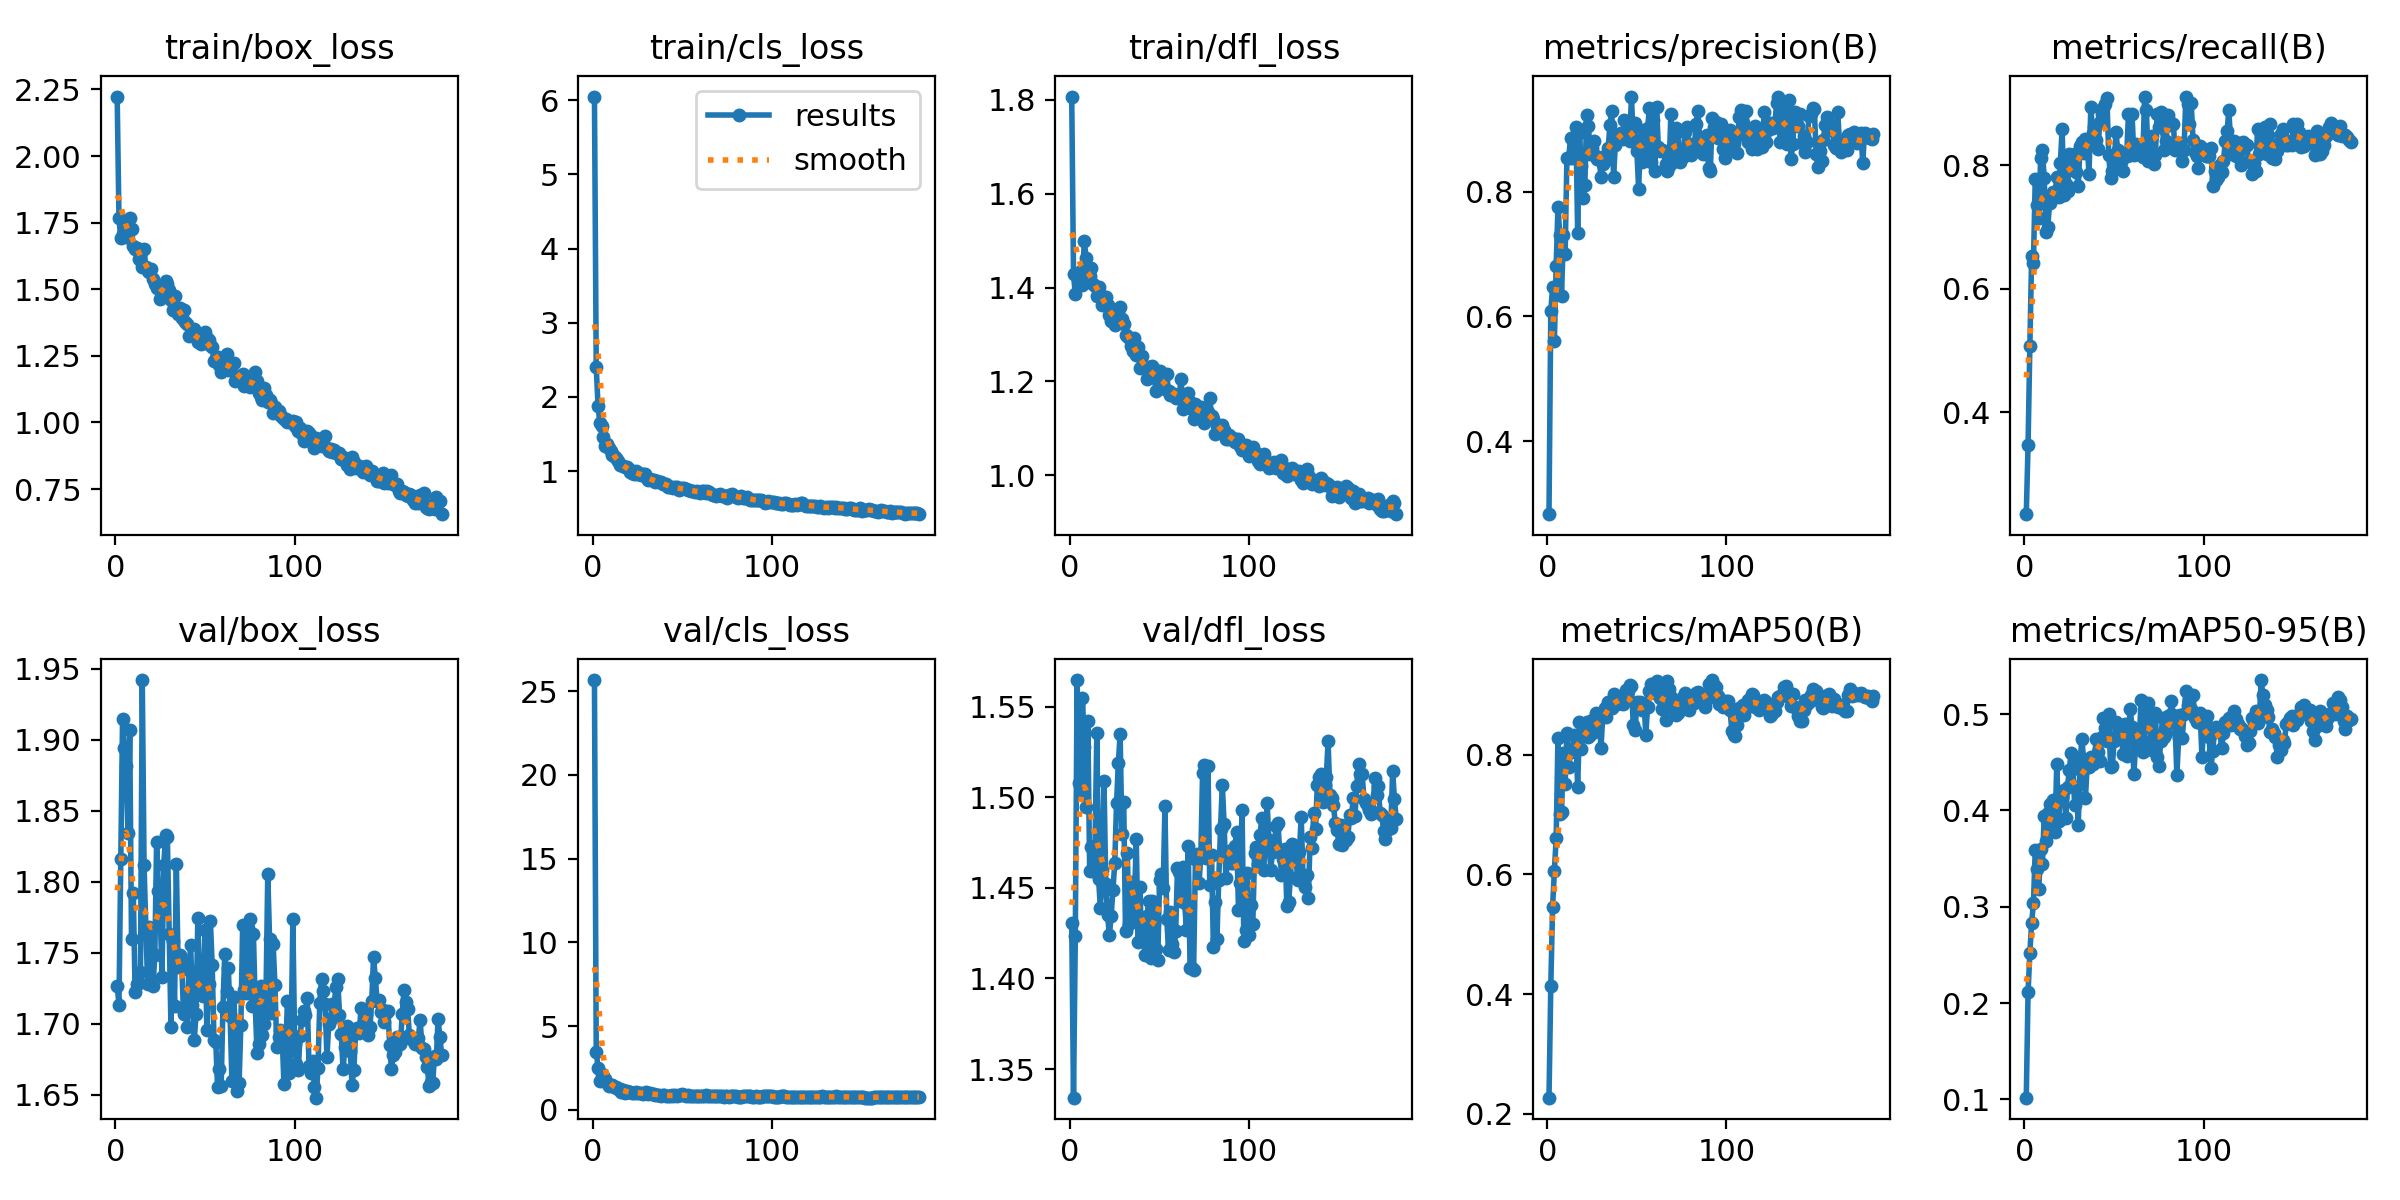

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1200)

/content


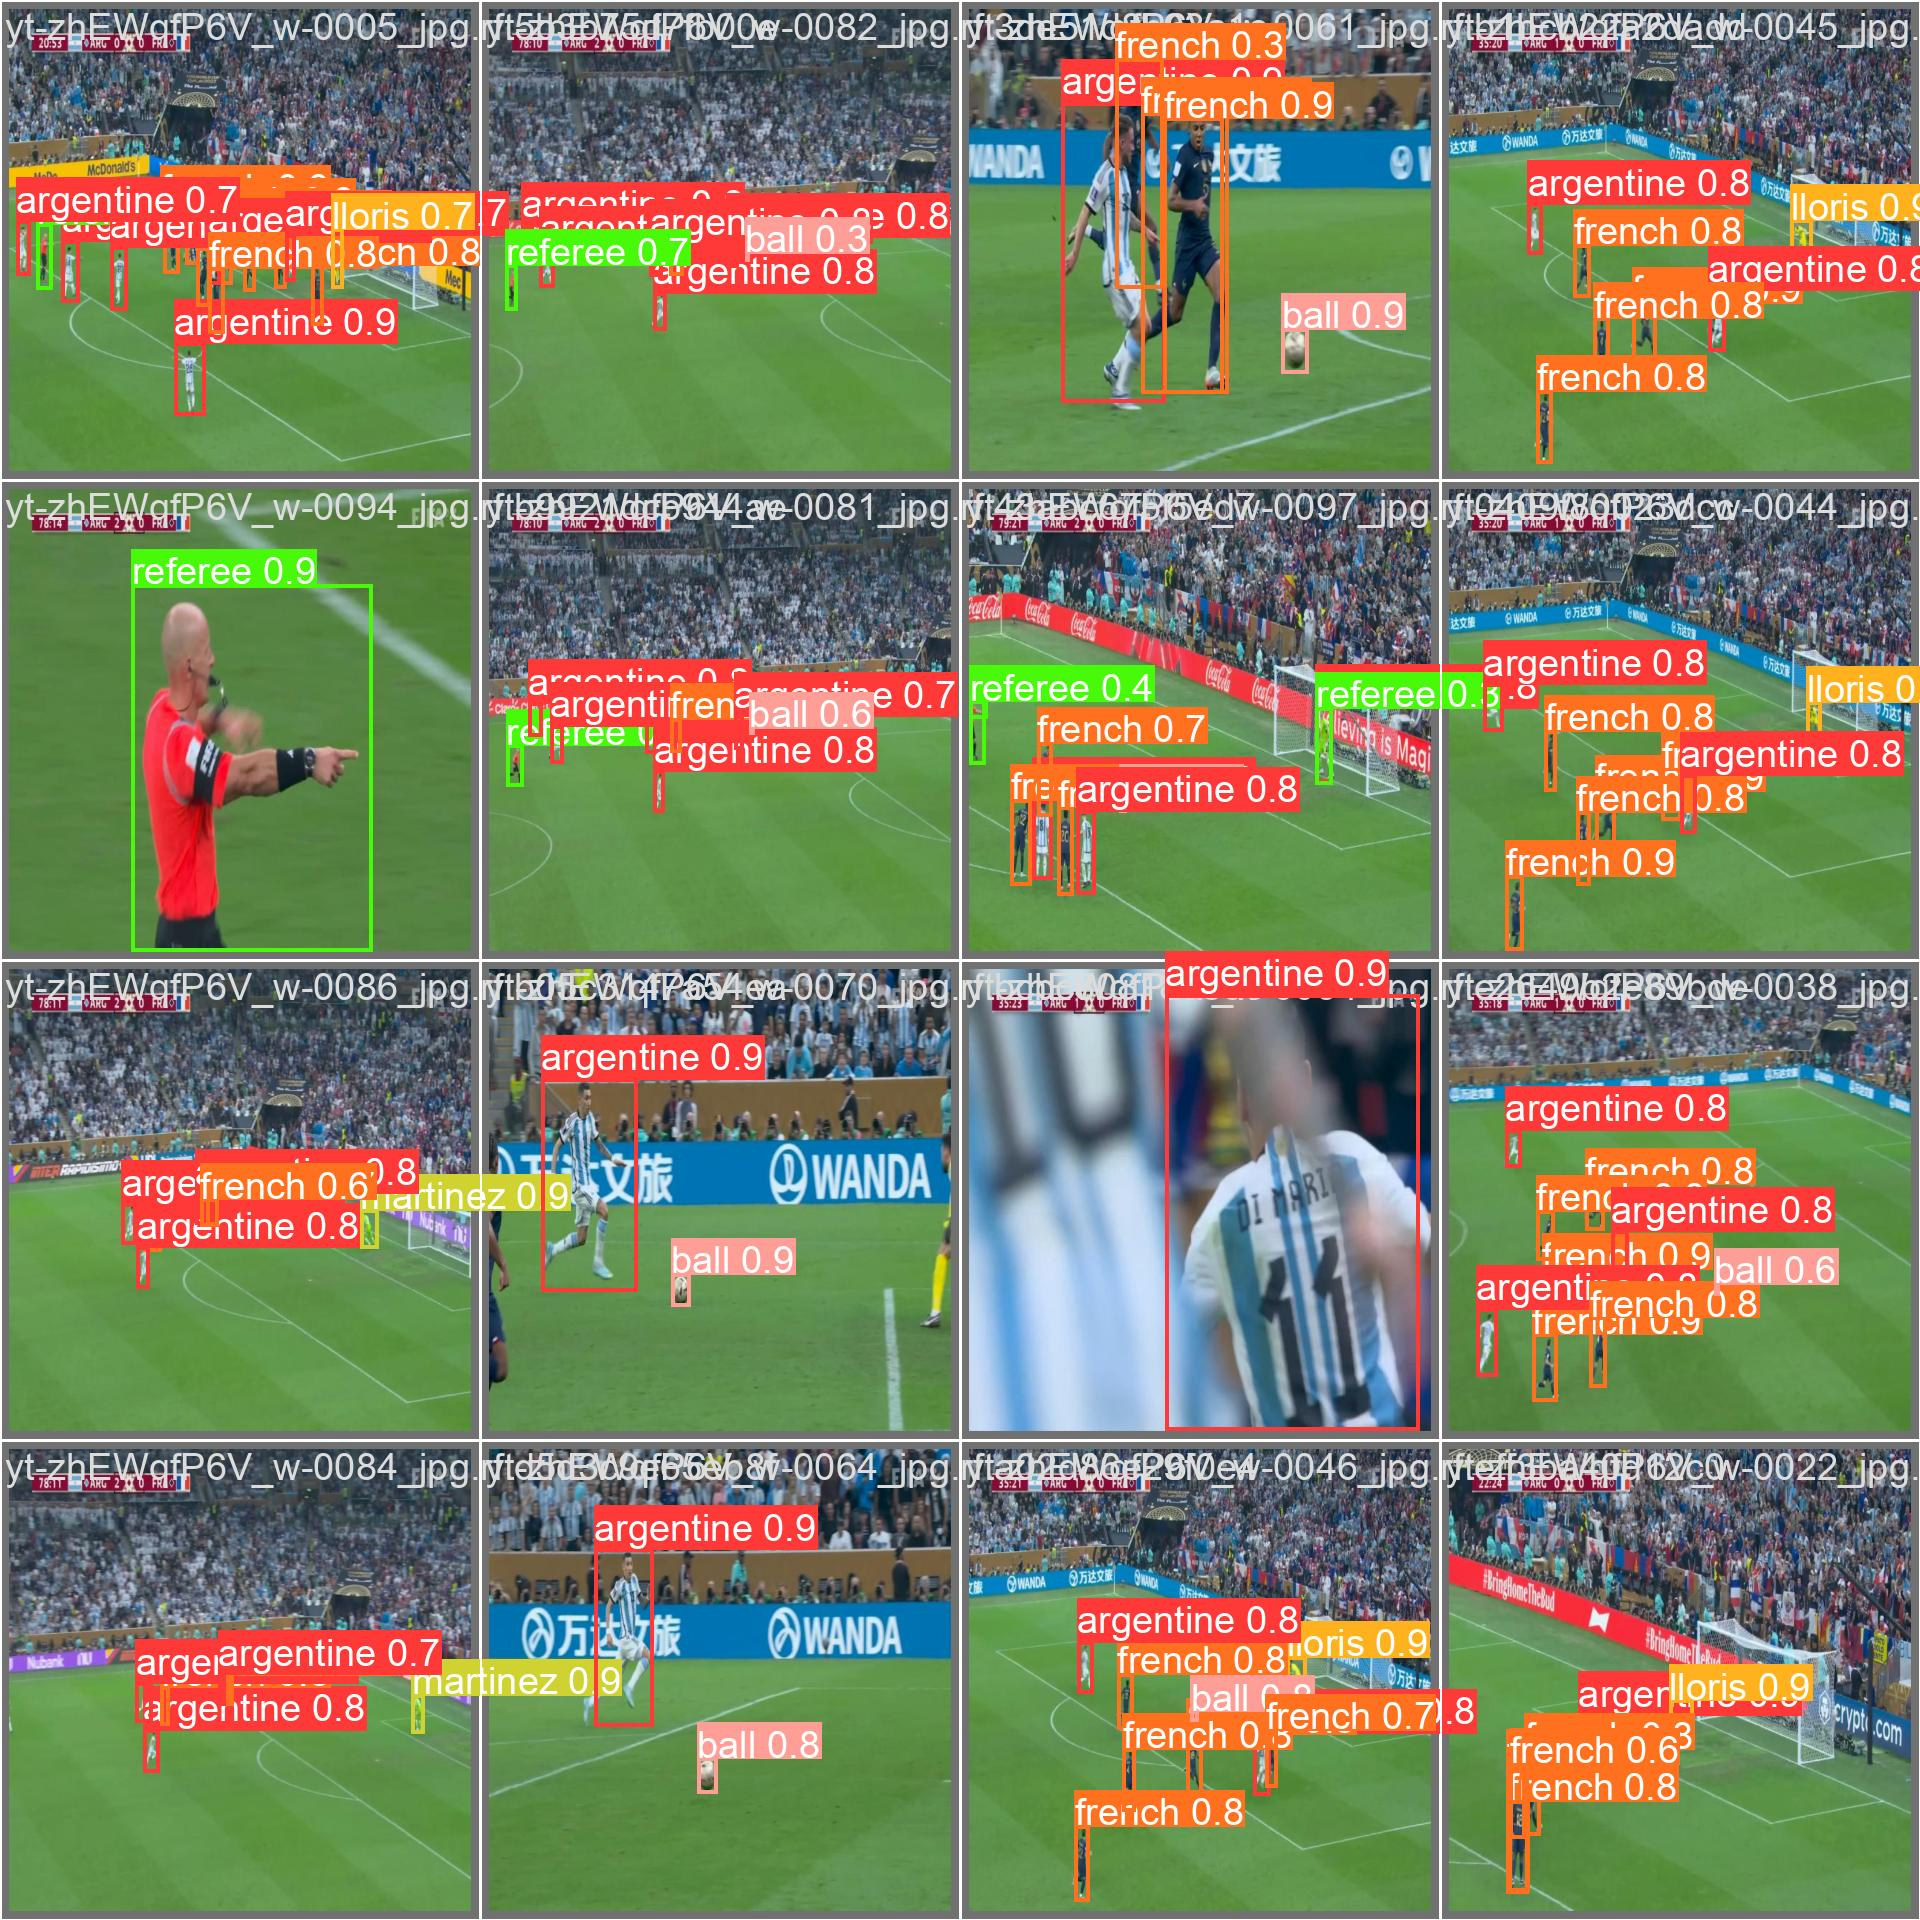

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1200)

#**Validate Custom Model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/france_vs_argentine-2/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.37s/it]
                   all         21        146      0.922      0.833       0.91      0.534
             argentine         21         46      0.869      0.913      0.912      0.506
                  ball         21         16      0.904      0.588       0.68      0.331
                french         21         62      0.939      0.887      0.938      0.486
                lloris         21          9          1      0.946      0.995      0.631
              martinez         21          4          1      0.663      0.995      0.668
               referee 

In [ ]:
!ls {HOME}/runs/detect/val/

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg


/content


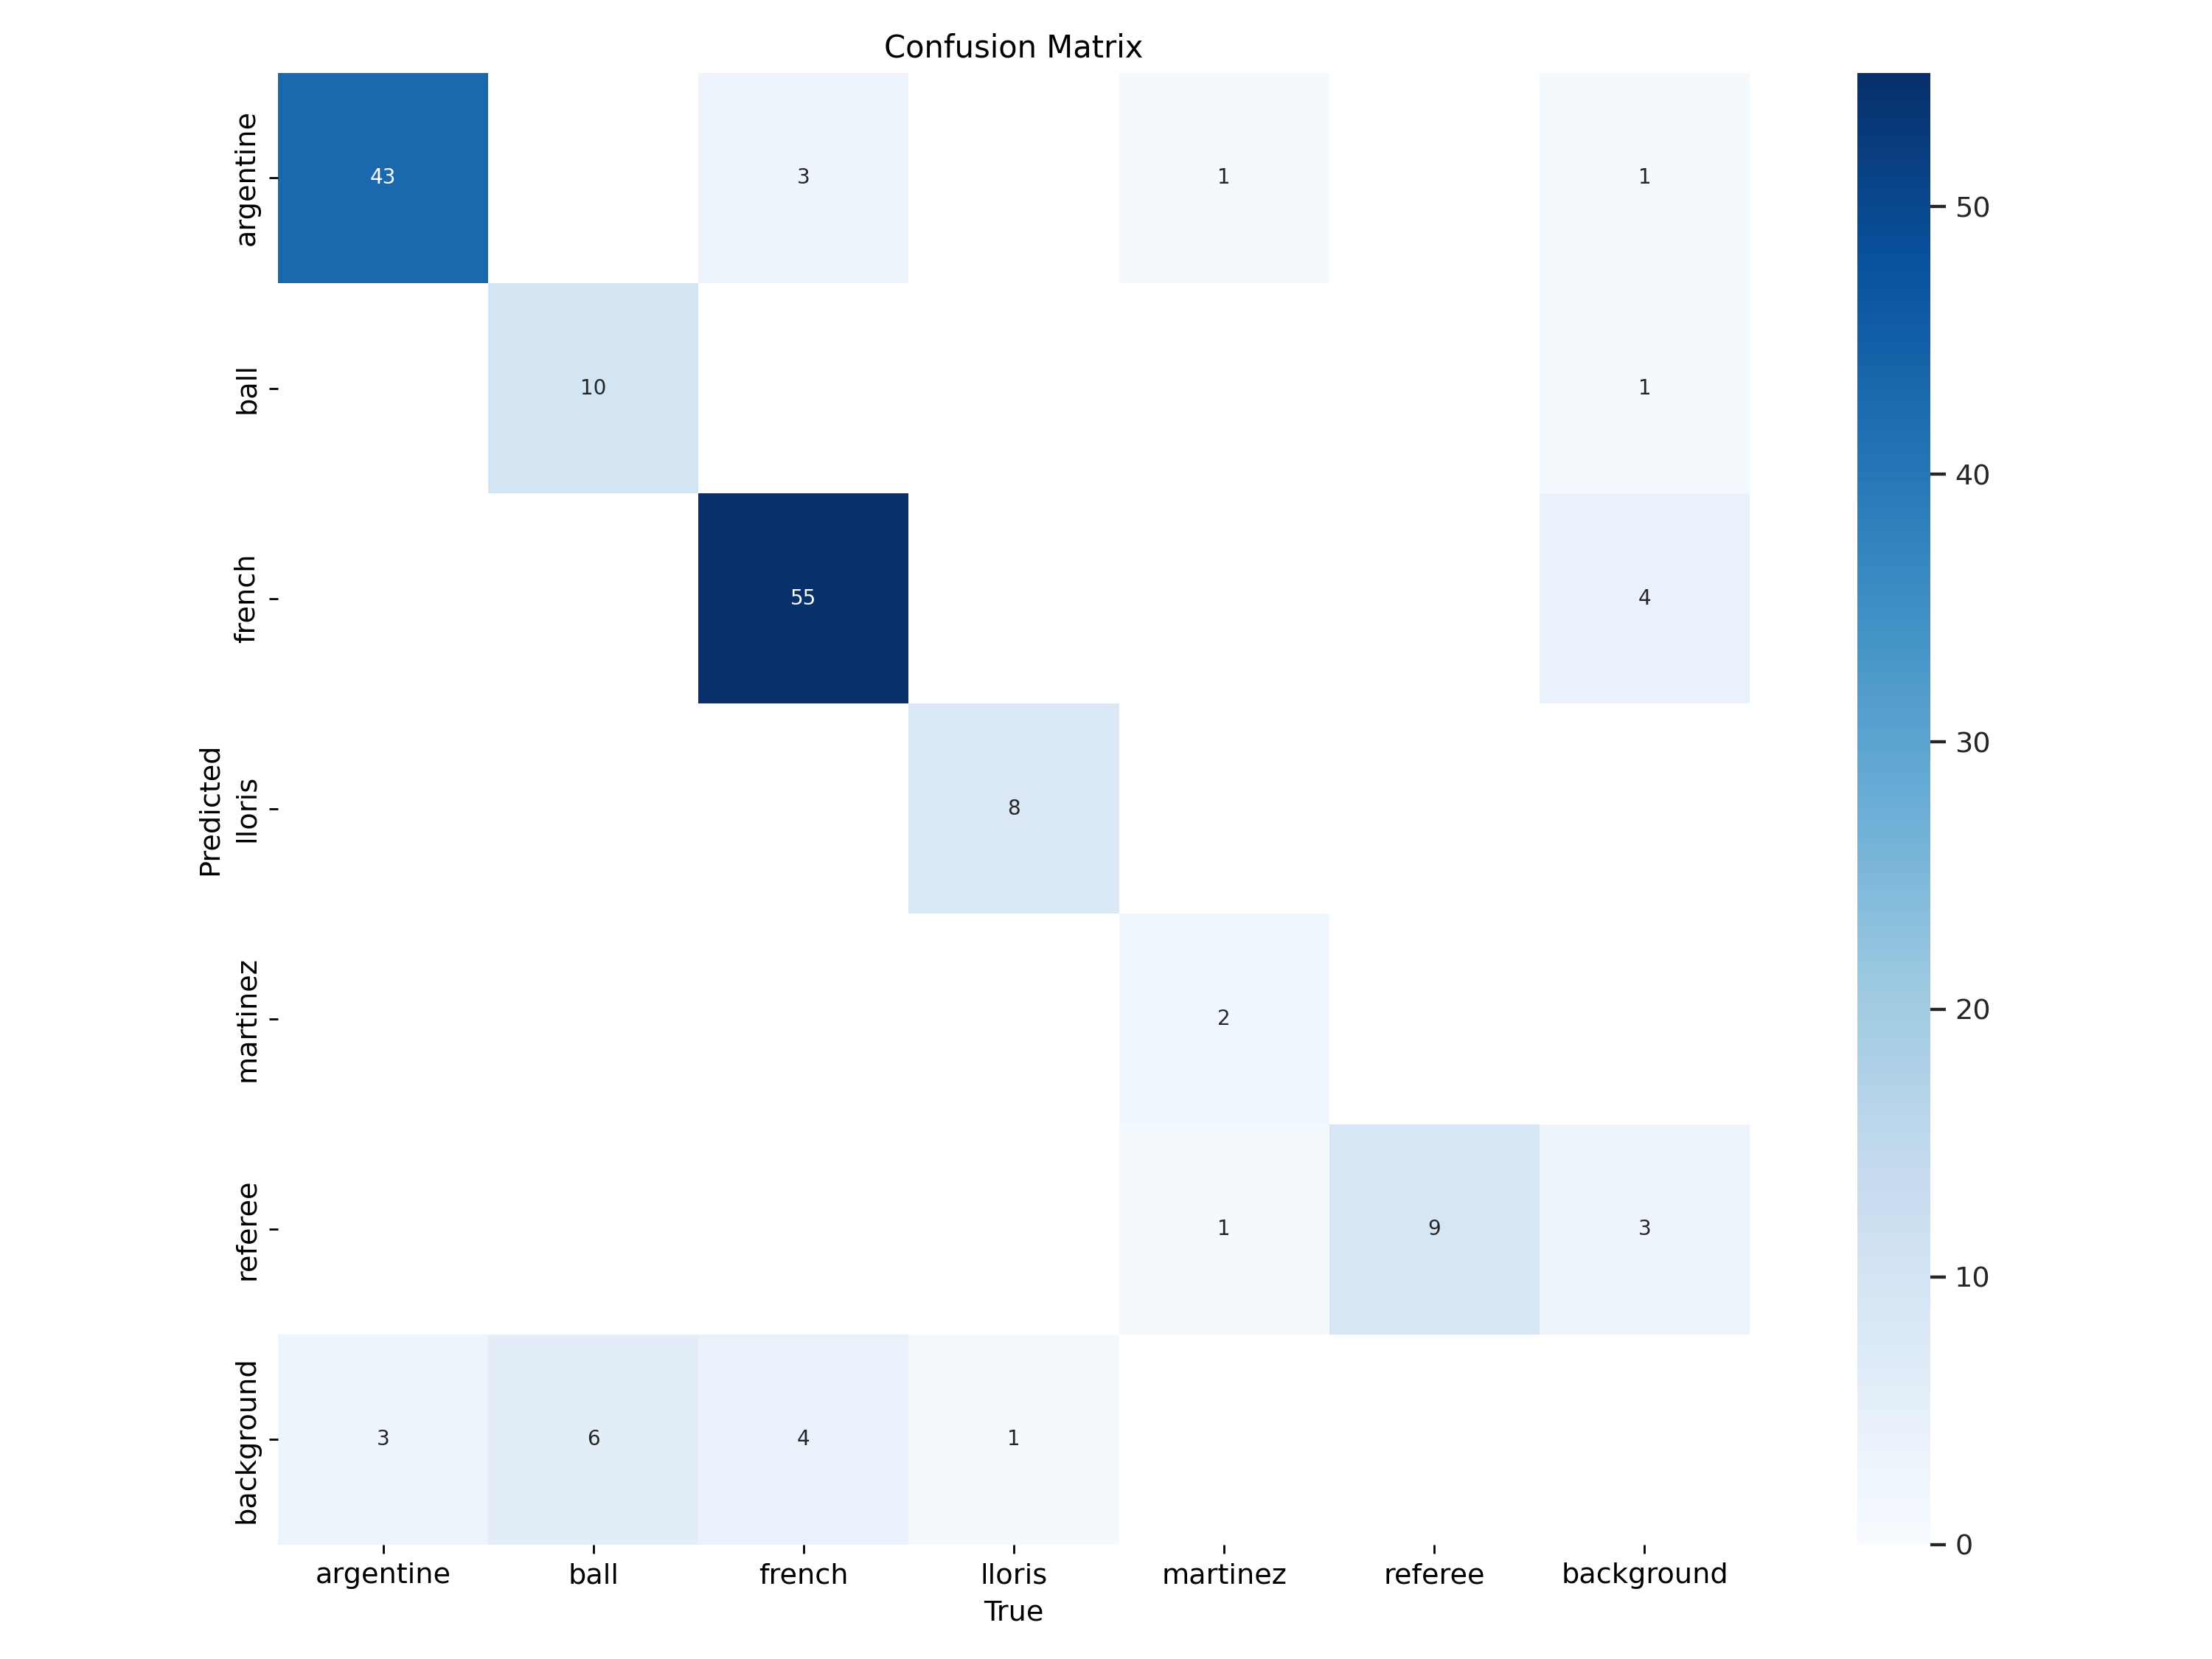

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=1200)

# **Detection**

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/test.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/977) /content/test.mp4: 480x800 6 argentines, 9 frenchs, 1 lloris, 1 referee, 101.3ms
video 1/1 (2/977) /content/test.mp4: 480x800 6 argentines, 9 frenchs, 1 lloris, 1 referee, 15.7ms
video 1/1 (3/977) /content/test.mp4: 480x800 7 argentines, 9 frenchs, 1 lloris, 1 referee, 15.7ms
video 1/1 (4/977) /content/test.mp4: 480x800 7 argentines, 9 frenchs, 1 lloris, 1 referee, 15.8ms
video 1/1 (5/977) /content/test.mp4: 480x800 8 argentines, 9 frenchs, 1 lloris, 1 referee, 15.7ms
video 1/1 (6/977) /content/test.mp4: 480x800 6 argentines, 10 frenchs, 1 lloris, 1 referee, 15.7ms
video 1/1 (7/977) /content/test.mp4: 480x800 6 argentines, 11 frenchs, 1 lloris, 1 referee, 15.7ms
video 1/1 (8/977) /content/test.mp4: 480x800 6 argentines, 10 frenchs, 1 lloris, 1 referee, 15.7ms
